In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Generating synthetic data set

In [11]:
np.random.seed(42)
X=2*np.random.rand(400,1) # feature
y = 4+3*X+np.random.randn(400,1) #linear relation with noise

In [12]:
df = pd.DataFrame({"X" : X.flatten(), "y": y.flatten()})
display(df.head())

,X,y
0,0.749080,7.552720
1,1.901429,9.725290
2,1.463988,9.073917
3,1.197317,7.281684
4,0.312037,5.260278


Splitting data

In [13]:
# splitting data into train(60% of data) and temp(40% of data)
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4,random_state=42) 
# splitting temp(40% of data) into validation(20% of data) and test(20% of data)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (240, 1), (240, 1)
Validation set: (80, 1), (80, 1)
Test set: (80, 1), (80, 1)


Train Linear Regression

In [14]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [15]:
print(f"Coefficients: {model.coef_}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")

Coefficients: [[2.96042542]]
Mean squared error: 1.048753391583055
R^2 score: 0.7544332015156019



Validation Evaluation:
  MSE  = 0.6768
  RMSE = 0.8227
  R²   = 0.7915

Test Evaluation:
  MSE  = 1.0488
  RMSE = 1.0241
  R²   = 0.7544


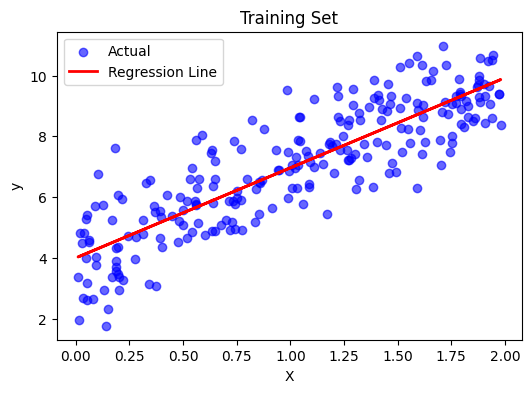

In [20]:
def evaluate(model, X, y, dataset_name):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    print(f"\n{dataset_name} Evaluation:")
    print(f"  MSE  = {mse:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  R²   = {r2:.4f}")
y_val_pred = evaluate(model, X_val, y_val, "Validation")
y_test_pred = evaluate(model, X_test, y_test, "Test")

def plot_regression(X, y, y_pred, title):
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, color="blue", alpha=0.6, label="Actual")
    plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot regression line on training, validation, test sets
plot_regression(X_train, y_train, model.predict(X_train), "Training Set")
# plot_regression(X_val, y_val, y_val_pred, "Validation Set")
# plot_regression(X_test, y_test, y_test_pred, "Test Set")